# Imports

In [1]:
from typing import Any, Union
from pathlib import Path
import sys
import subprocess

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tqdm import tqdm
import torch
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
import sklearn
import transformers

repo_dir = Path(subprocess.check_output(["git", "rev-parse", "--show-toplevel"]).decode().strip())
data_dir = repo_dir / "data"
sys.path.append(str(repo_dir))
from src import bert

plt.style.use('Solarize_Light2')
%config InlineBackend.figure_format='retina'
plt.rcParams["figure.dpi"] = 150

%load_ext autoreload
%autoreload 2

https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

In [2]:
data_fp = data_dir / "all-data.csv"

if not data_fp.exists():
    import kaggle

    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(
        "ankurzing/sentiment-analysis-for-financial-news",
        path=data_dir,
        unzip=True,
    )

**Context**

This dataset contains the sentiments for financial news headlines from the perspective of a retail investor. Further details about the dataset can be found in: Malo, P., Sinha, A., Takala, P., Korhonen, P. and Wallenius, J. (2014): “Good debt or bad debt: Detecting semantic orientations in economic texts.” Journal of the American Society for Information Science and Technology.



In [3]:
data = pd.read_csv(
    data_fp,
    names=["label", "text"],
    encoding="cp866",
)
data

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


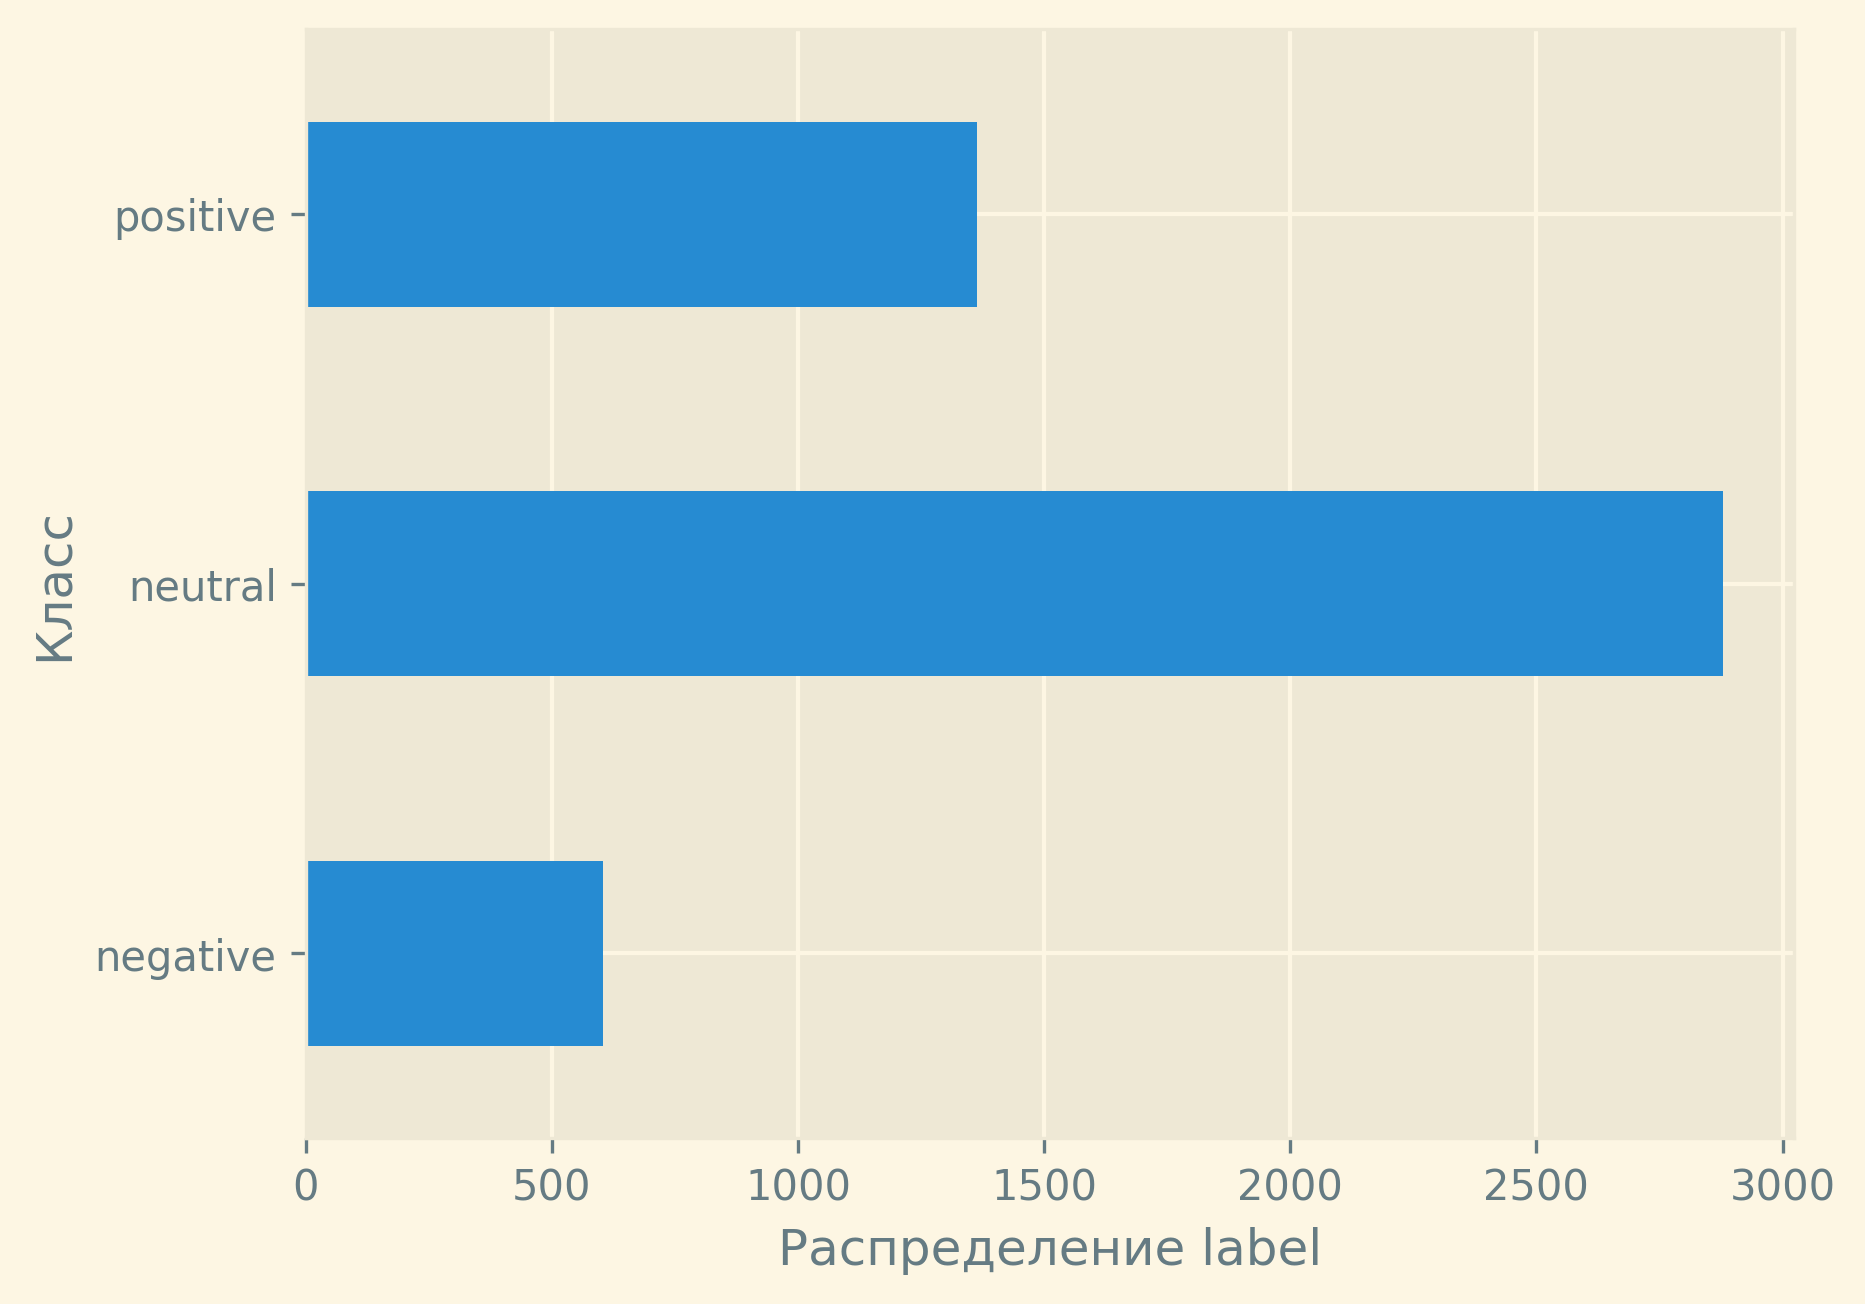

In [7]:
labels = ["negative", "neutral", "positive"]
features = data["label"].value_counts()[labels]
ax = features.plot.barh()
ax.set_ylabel("Класс")
ax.set_xlabel("Распределение label")

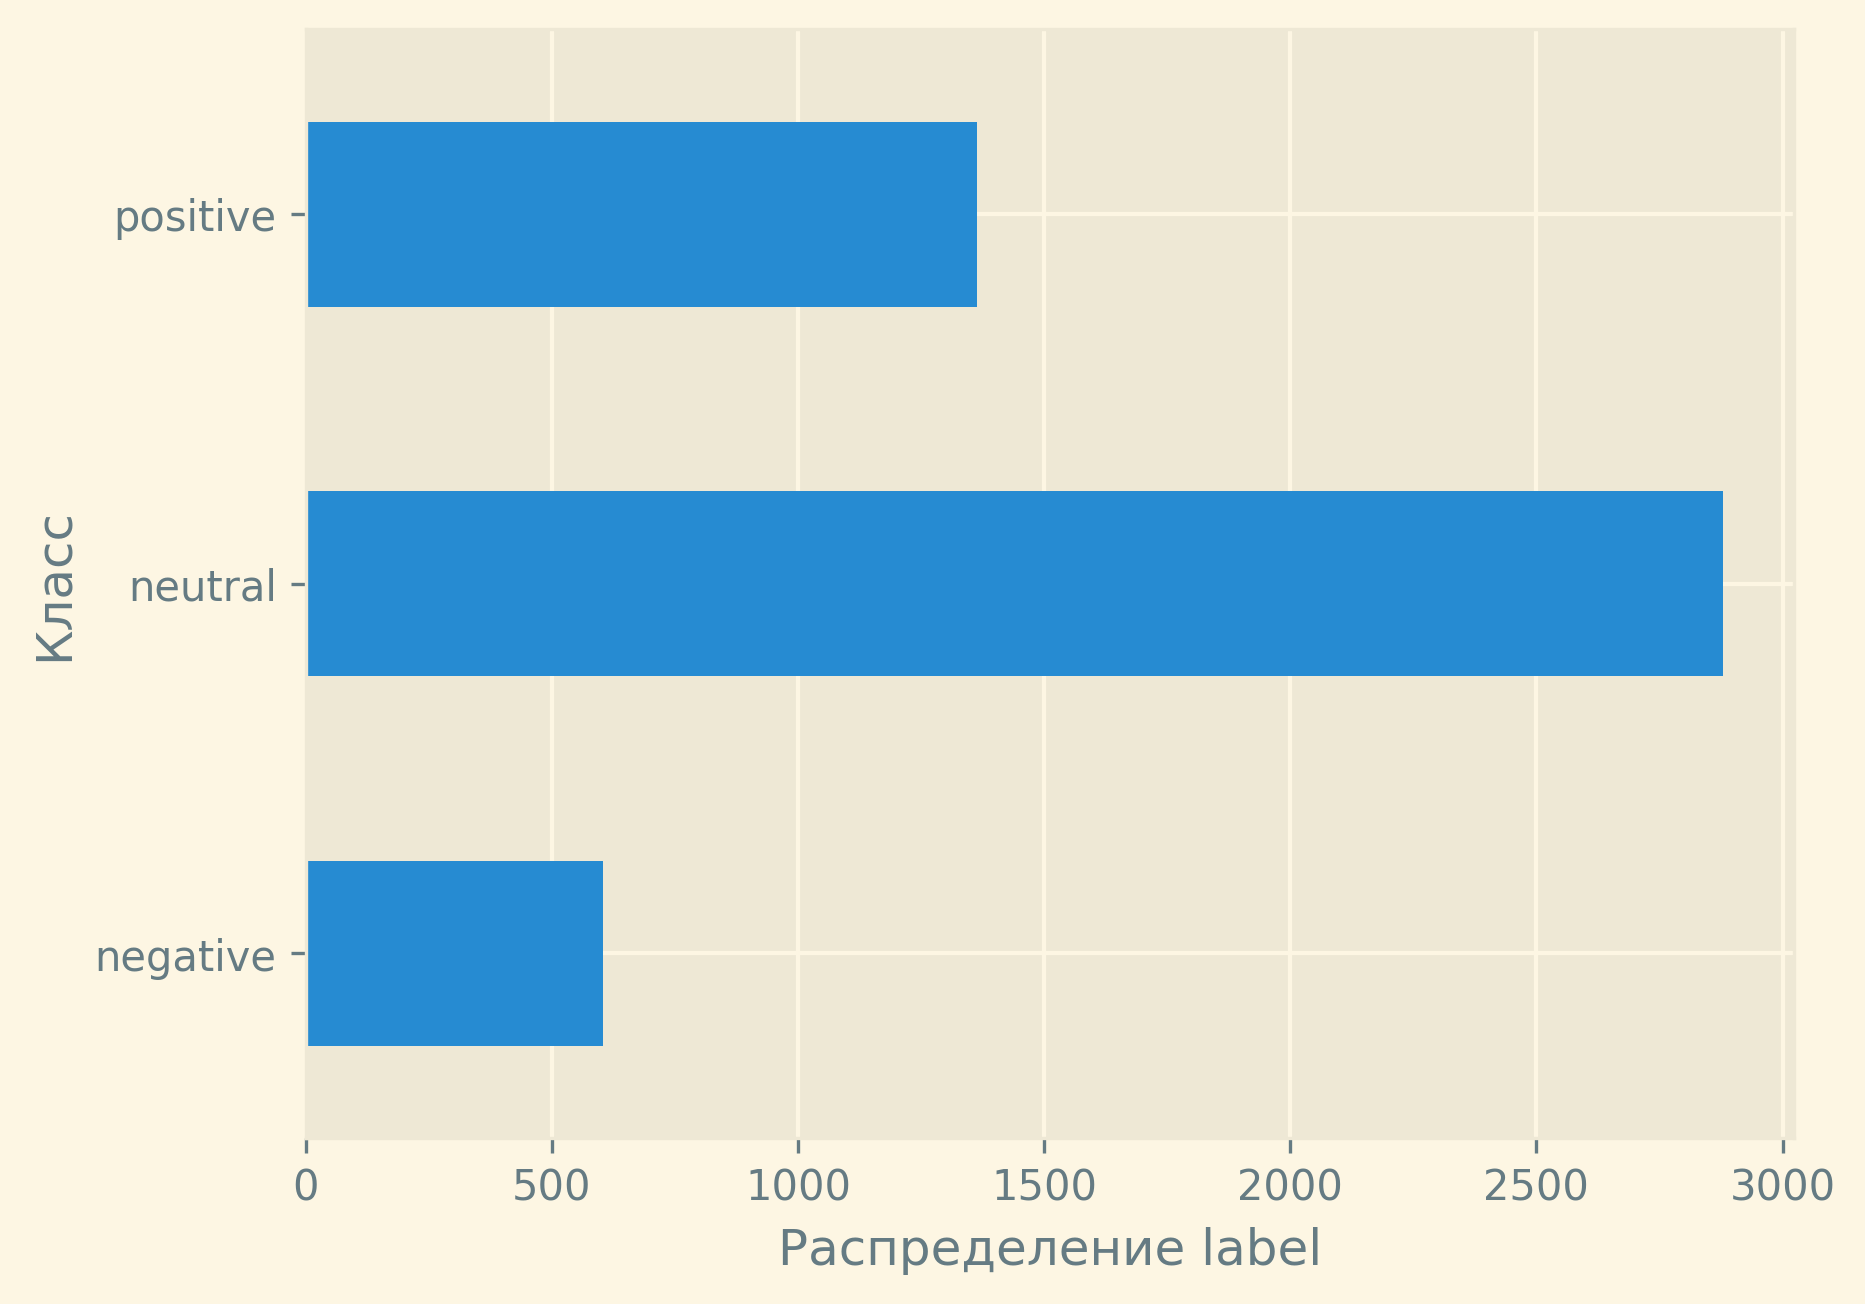

In [ ]:
labels = ["negative", "neutral", "positive"]
features = data["label"].value_counts()[labels]
ax = features.plot.barh()
ax.set_ylabel("Класс")
ax.set_xlabel("Распределение label")

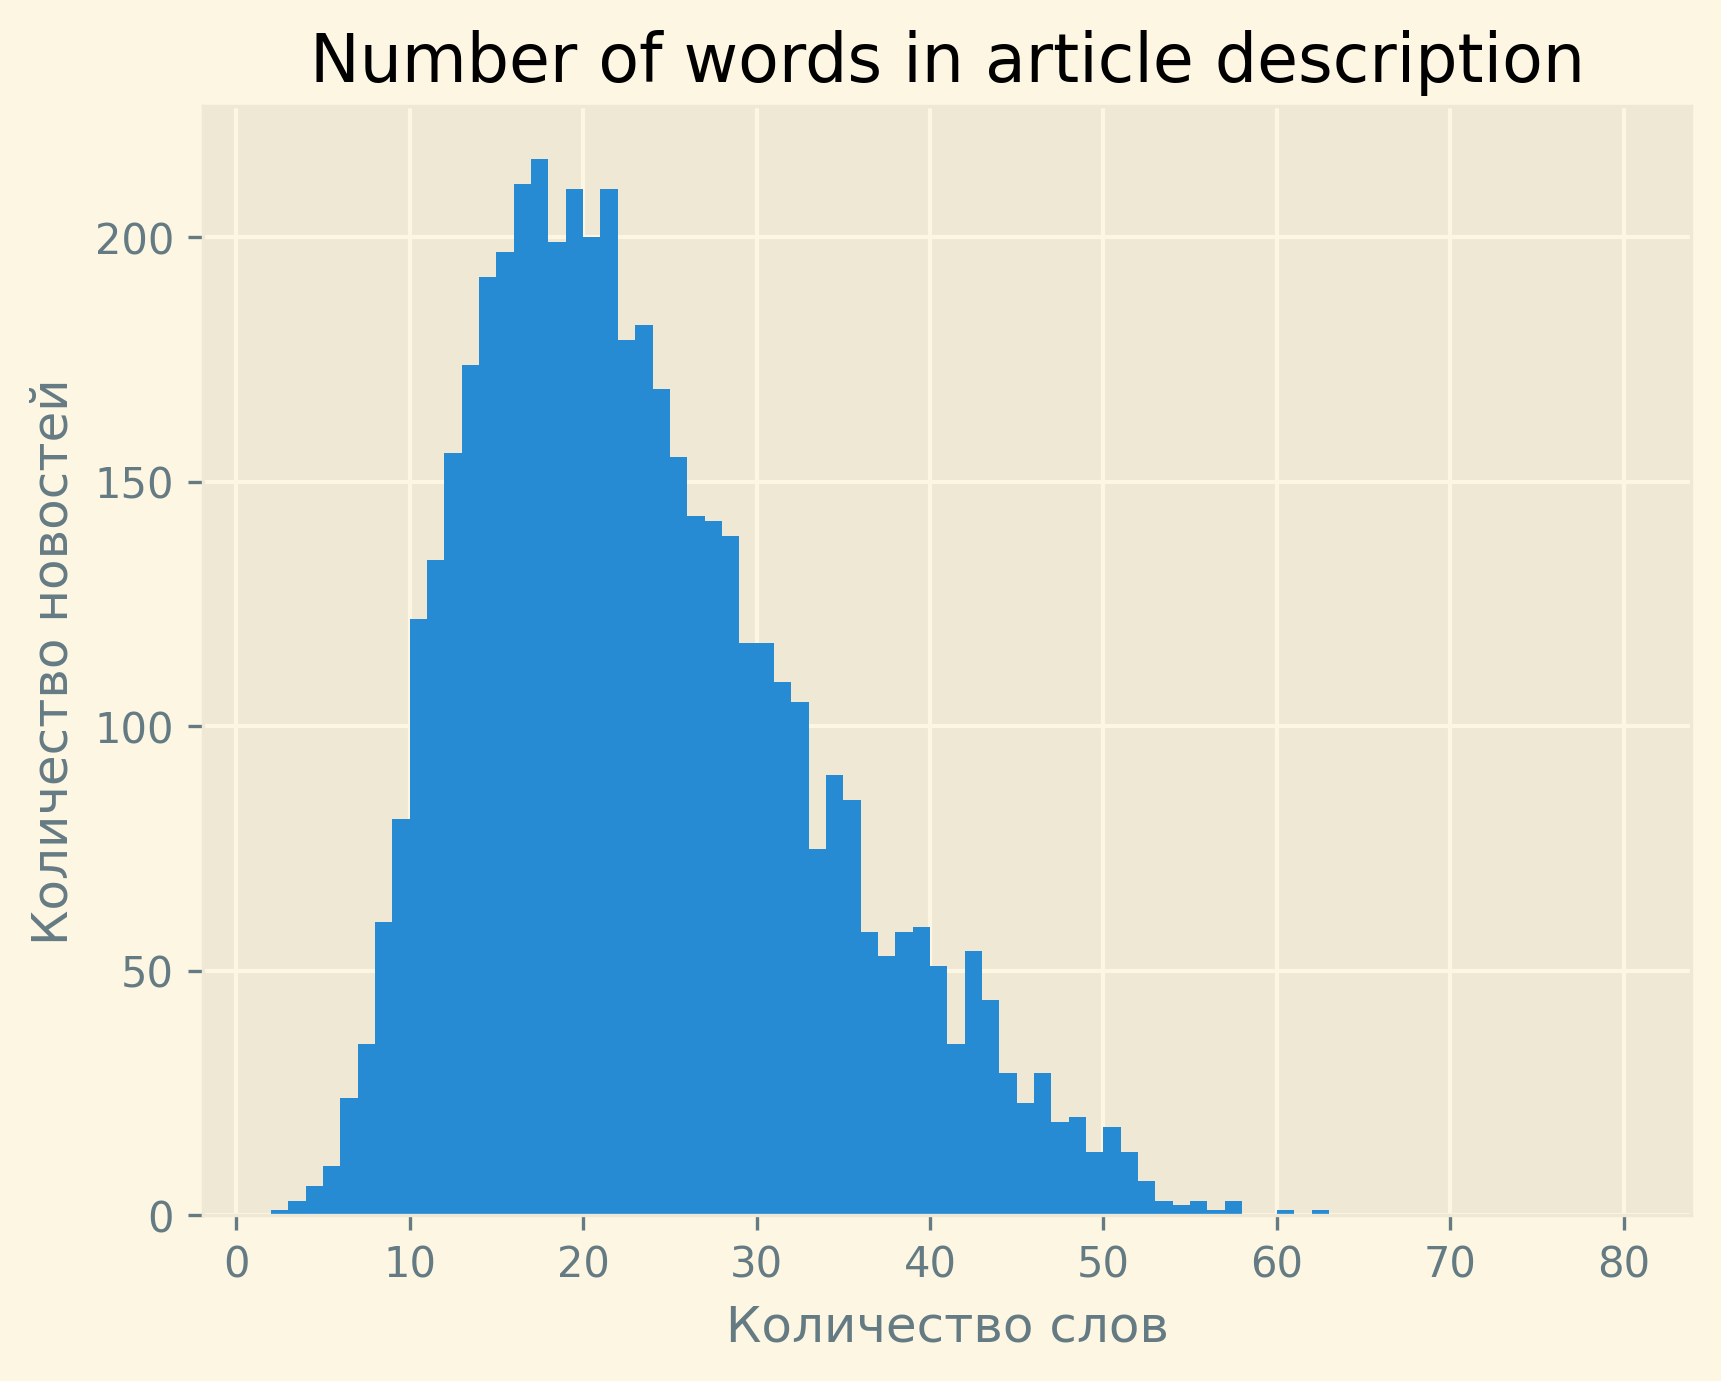

In [15]:
features = data["text"].str.split().apply(len)

bins = range(features.min(), features.max())
ax = features.hist(bins=bins)
ax.set_title("Number of words in article description")
ax.set_xlabel("Количество слов")
ax.set_ylabel("Количество новостей")

In [19]:
data[features < 5]

,label,text
1023,neutral,All are welcome .
1116,neutral,Welcome !
2399,neutral,All rights reserved .
2518,neutral,Net investment income
2554,neutral,Registration is required .
2569,neutral,Status : Agreed
2983,neutral,It 's not .
3061,neutral,NWC ANALYSIS :
3099,neutral,R&D Loan ) .
3450,neutral,What we think ?
